<a href="https://colab.research.google.com/github/zinseo964/dam_flow/blob/main/damwithhour_allday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
rain_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/total_rain.csv',encoding='utf-8')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/data.csv',encoding='utf-8')

In [3]:
start_date = pd.to_datetime('1974-01-01')
end_date = pd.to_datetime('2023-12-31')

data['date'] = pd.date_range(start_date, end_date, freq='D').strftime('%Y-%m-%d')

data = data.fillna(0)
# data.set_index("date")
data.index = data['date']
print(data)

                  date  1:00  2:00  3:00  4:00  5:00  6:00  7:00  8:00  9:00  \
date                                                                           
1974-01-01  1974-01-01     0     0     0     0     0     0     0     0     0   
1974-01-02  1974-01-02     0     0     0     0     0     0     0     0     0   
1974-01-03  1974-01-03     0     0     0     0     0     0     0     0     0   
1974-01-04  1974-01-04     0     0     0     0     0     0     0     0     0   
1974-01-05  1974-01-05     0     0     0     0     0     0     0     0     0   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-12-27  2023-12-27     0     0     0     0     0     0     0     0     0   
2023-12-28  2023-12-28     0     0     0     0     0     0     0     0     0   
2023-12-29  2023-12-29     0     0     0     0     0     0     0     0     0   
2023-12-30  2023-12-30     0     0     0     0     0     0     0     0     0   
2023-12-31  2023-12-31     0     0     0

In [4]:
for l in range(len(rain_data)):
  date_value = rain_data['date'][l]
  hour_value = rain_data['hour'][l]
  code_value = rain_data['code'][l]
  rain_value = rain_data['rain'][l]

  # print(date_value, hour_value, code_value, rain_value)
  rain = data.loc[date_value][hour_value]
  if code_value == 100:
    rain_value = rain_value * 0.114
  elif code_value == 101 :
    rain_value = rain_value * 0.128
  elif code_value == 90:
    rain_value = rain_value * 0.094
  elif code_value == 211:
    rain_value = rain_value * 0.668
  rain = rain + rain_value
  data.loc[date_value, hour_value] = rain

print(data)

                  date  1:00  2:00  3:00  4:00  5:00  6:00  7:00  8:00  9:00  \
date                                                                           
1974-01-01  1974-01-01   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1974-01-02  1974-01-02   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1974-01-03  1974-01-03   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1974-01-04  1974-01-04   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1974-01-05  1974-01-05   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-12-27  2023-12-27   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2023-12-28  2023-12-28   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2023-12-29  2023-12-29   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2023-12-30  2023-12-30   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2023-12-31  2023-12-31   0.0   0.0   0.0

In [5]:
dam_flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/total_dam.csv',encoding='utf-8')
dam_flow.set_index("date", inplace = True)
print(dam_flow)

               dam  dam_avg_rain
date                            
1974-01-01  10.000        0.0000
1974-01-02   9.000        0.0000
1974-01-03   4.800        0.0000
1974-01-04   6.100        0.0000
1974-01-05   5.800        0.0000
...            ...           ...
2023-12-27  25.873        0.0000
2023-12-28  21.186        0.0000
2023-12-29  20.887        0.0000
2023-12-30  29.183        3.8218
2023-12-31  25.803        5.5731

[18250 rows x 2 columns]


In [6]:
data_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/data_3hour.csv',encoding='utf-8')

In [7]:
data_3['date'] = data['date']

In [8]:
print(data_3)

                  date 3:00 6:00 9:00 12:00 15:00 18:00 21:00 0:00 dam_flow
date                                                                       
1974-01-01  1974-01-01  NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN      NaN
1974-01-02  1974-01-02  NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN      NaN
1974-01-03  1974-01-03  NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN      NaN
1974-01-04  1974-01-04  NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN      NaN
1974-01-05  1974-01-05  NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN      NaN
...                ...  ...  ...  ...   ...   ...   ...   ...  ...      ...
2023-12-27  2023-12-27  NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN      NaN
2023-12-28  2023-12-28  NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN      NaN
2023-12-29  2023-12-29  NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN      NaN
2023-12-30  2023-12-30  NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN      NaN
2023-12-31  2023-12-31  NaN  NaN  NaN   NaN   NaN   NaN   NaN  NaN      NaN

[18262 rows

In [9]:
data_3 = data_3.fillna(0)

In [11]:
for Cdate in data['date']:
  data_3.loc[Cdate,'3:00'] = data.loc[Cdate,'1:00']+data.loc[Cdate,'2:00']+ data.loc[Cdate,'3:00']
  data_3.loc[Cdate,'6:00'] = data.loc[Cdate,'4:00']+data.loc[Cdate,'5:00']+ data.loc[Cdate,'6:00']
  data_3.loc[Cdate,'9:00'] = data.loc[Cdate,'7:00']+data.loc[Cdate,'8:00']+ data.loc[Cdate,'9:00']
  data_3.loc[Cdate,'12:00'] = data.loc[Cdate,'10:00']+data.loc[Cdate,'11:00']+ data.loc[Cdate,'12:00']
  data_3.loc[Cdate,'15:00'] = data.loc[Cdate,'13:00']+data.loc[Cdate,'14:00']+ data.loc[Cdate,'15:00']
  data_3.loc[Cdate,'18:00'] = data.loc[Cdate,'16:00']+data.loc[Cdate,'17:00']+ data.loc[Cdate,'18:00']
  data_3.loc[Cdate,'21:00'] = data.loc[Cdate,'19:00']+data.loc[Cdate,'20:00']+ data.loc[Cdate,'21:00']
  data_3.loc[Cdate,'0:00'] = data.loc[Cdate,'22:00']+data.loc[Cdate,'23:00']+ data.loc[Cdate,'0:00']

In [12]:
print(data_3)

                  date  3:00  6:00  9:00  12:00   15:00   18:00  21:00  0:00  \
date                                                                           
1974-01-01  1974-01-01   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
1974-01-02  1974-01-02   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
1974-01-03  1974-01-03   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
1974-01-04  1974-01-04   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
1974-01-05  1974-01-05   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
...                ...   ...   ...   ...    ...     ...     ...    ...   ...   
2023-12-27  2023-12-27   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
2023-12-28  2023-12-28   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
2023-12-29  2023-12-29   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
2023-12-30  2023-12-30   0.0   0.0   0.0   2.28  7.7254  2.9022    0.0  0.00   
2023-12-31  2023-12-31   0.0   0.0   0.0

In [13]:
final_data = pd.concat([data_3, dam_flow], axis = 1)

In [14]:
print(final_data)

                  date  3:00  6:00  9:00  12:00   15:00   18:00  21:00  0:00  \
date                                                                           
1974-01-01  1974-01-01   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
1974-01-02  1974-01-02   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
1974-01-03  1974-01-03   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
1974-01-04  1974-01-04   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
1974-01-05  1974-01-05   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
...                ...   ...   ...   ...    ...     ...     ...    ...   ...   
2023-12-27  2023-12-27   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
2023-12-28  2023-12-28   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
2023-12-29  2023-12-29   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
2023-12-30  2023-12-30   0.0   0.0   0.0   2.28  7.7254  2.9022    0.0  0.00   
2023-12-31  2023-12-31   0.0   0.0   0.0

In [15]:
final_data = final_data.drop(['dam_flow'], axis=1)
print(final_data)

                  date  3:00  6:00  9:00  12:00   15:00   18:00  21:00  0:00  \
date                                                                           
1974-01-01  1974-01-01   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
1974-01-02  1974-01-02   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
1974-01-03  1974-01-03   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
1974-01-04  1974-01-04   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
1974-01-05  1974-01-05   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
...                ...   ...   ...   ...    ...     ...     ...    ...   ...   
2023-12-27  2023-12-27   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
2023-12-28  2023-12-28   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
2023-12-29  2023-12-29   0.0   0.0   0.0   0.00  0.0000  0.0000    0.0  0.00   
2023-12-30  2023-12-30   0.0   0.0   0.0   2.28  7.7254  2.9022    0.0  0.00   
2023-12-31  2023-12-31   0.0   0.0   0.0

<Axes: xlabel='date'>

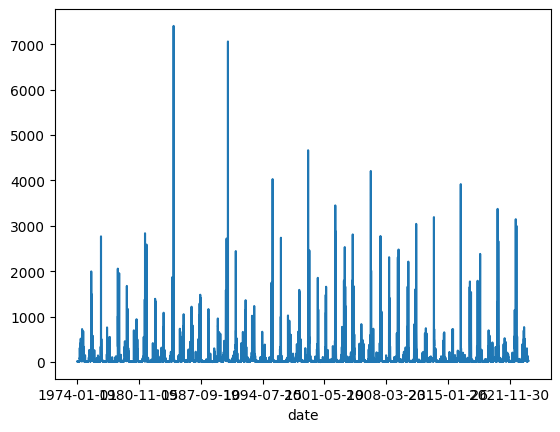

In [17]:
damflow = final_data['dam']

damflow.plot()

In [18]:
print(max(final_data['dam']))

7405.6


In [21]:
final_data['Y'] = final_data['dam']
final_data = final_data.dropna()

train = final_data[final_data['date']<'2009-01-01']
valid = final_data[final_data['date']>='2009-01-01']
valid = valid[valid['date']<'2017-01-01']
test = final_data[final_data['date']>='2017-01-01']
print('train set : ', len(train),"\n",
      'valid set : ', len(valid), "\n",
      'test set : ', len(test), "\n")

trainX, trainY = train.drop(['date', 'Y'], axis = 1), train['Y']
# trainX = trainX.to_numpy()
# trainY = trainY.to_numpy()
# trainX = trainX.reshape(trainX.shape[0], trainX.shape[1],1)

validX, validY = valid.drop(['date', 'Y'], axis = 1), valid['Y']
# validX = validX.to_numpy()
# validY = validY.to_numpy()
# validX = validX.reshape(validX.shape[0], validX.shape[1],1)

testX, testY = test.drop(['date','Y'], axis = 1), test['Y']
# testX = testX.to_numpy()
# testY = testY.to_numpy()
# testX = testX.reshape(testX.shape[0], testX.shape[1],1)


train set :  12776 
 valid set :  2920 
 test set :  2554 



In [22]:
print(trainX.shape, trainY.shape)

print(trainX)

(12776, 10) (12776,)
            3:00    6:00  9:00   12:00  15:00  18:00  21:00  0:00     dam  \
date                                                                        
1974-01-01   0.0  0.0000   0.0  0.0000    0.0    0.0    0.0   0.0  10.000   
1974-01-02   0.0  0.0000   0.0  0.0000    0.0    0.0    0.0   0.0   9.000   
1974-01-03   0.0  0.0000   0.0  0.0000    0.0    0.0    0.0   0.0   4.800   
1974-01-04   0.0  0.0000   0.0  0.0000    0.0    0.0    0.0   0.0   6.100   
1974-01-05   0.0  0.0000   0.0  0.0000    0.0    0.0    0.0   0.0   5.800   
...          ...     ...   ...     ...    ...    ...    ...   ...     ...   
2008-12-27   0.0  0.0000   0.0  0.0000    0.0    0.0    0.0   0.0   4.515   
2008-12-28   0.0  0.0000   0.0  0.0000    0.0    0.0    0.0   0.0   0.000   
2008-12-29   0.0  0.0000   0.0  0.0668    0.0    0.0    0.0   0.0   4.083   
2008-12-30   0.0  0.0342   0.0  0.0000    0.0    0.0    0.0   0.0   0.000   
2008-12-31   0.0  0.0000   0.0  0.0000    0.0    0.0   

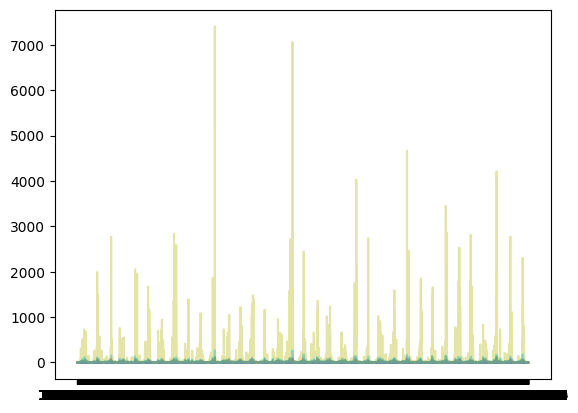

In [50]:
from matplotlib import pyplot as plt
plt.plot(trainX, alpha = 0.4)

In [25]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import *
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

modelnew = Sequential()

modelnew.add(LSTM(64, input_shape = (10,1)))
modelnew.add(Dense(40, 'relu'))
modelnew.add(Dense(40, 'relu'))
modelnew.add(Dense(8, 'relu'))
modelnew.add(Dense(8))
modelnew.add(Dense(1))

modelnew.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_5 (Dense)             (None, 40)                2600      
                                                                 
 dense_6 (Dense)             (None, 40)                1640      
                                                                 
 dense_7 (Dense)             (None, 8)                 328       
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 21545 (84.16 KB)
Trainable params: 21545

In [26]:
cp1 = ModelCheckpoint('modelnew/', save_best_only=True)
modelnew.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
modelnew.fit(trainX, trainY, validation_data = (validX, validY), batch_size = 100, epochs=50, callbacks=[cp1])

Epoch 1/50
1278/1278 [==============================] - 21s 14ms/step - loss: 51634.2852 - root_mean_squared_error: 227.2318 - val_loss: 30970.5430 - val_root_mean_squared_error: 175.9845
Epoch 2/50
1278/1278 [==============================] - 16s 12ms/step - loss: 29529.9609 - root_mean_squared_error: 171.8428 - val_loss: 14144.9512 - val_root_mean_squared_error: 118.9325
Epoch 3/50
1278/1278 [==============================] - 14s 11ms/step - loss: 18447.8457 - root_mean_squared_error: 135.8228 - val_loss: 7439.8433 - val_root_mean_squared_error: 86.2545
Epoch 4/50
1278/1278 [==============================] - 14s 11ms/step - loss: 12372.4004 - root_mean_squared_error: 111.2313 - val_loss: 4096.5381 - val_root_mean_squared_error: 64.0042
Epoch 5/50
1278/1278 [==============================] - 15s 12ms/step - loss: 8720.6348 - root_mean_squared_error: 93.3843 - val_loss: 1723.9856 - val_root_mean_squared_error: 41.5209
Epoch 6/50
1278/1278 [==============================] - 16s 12ms/ste

In [27]:
train_score = modelnew.evaluate(testX, testY, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score[0], np.sqrt(train_score[0])))

80/80 [==============================] - 1s 4ms/step - loss: 736.1287 - root_mean_squared_error: 27.1317
Train Score: 736.13 MSE (27.13 RMSE)


In [28]:
# from tensorflow.keras.models import load_model
# model = load_model('model/')

train_predictions = modelnew.predict(trainX).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':trainY})
train_results

400/400 [==============================] - 2s 3ms/step


,Train Predictions,Actuals
date,,
1974-01-01,6.280001,10.000
1974-01-02,5.262710,9.000
1974-01-03,0.834357,4.800
1974-01-04,2.178801,6.100
1974-01-05,1.862324,5.800
...,...,...
2008-12-27,0.551256,4.515
2008-12-28,-3.237918,0.000
2008-12-29,0.151365,4.083


from matplotlib import pyplot as plt
train_results['Train Predictions'].plot(kind='hist', bins=20, title='Train Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_results['Actuals'].plot(kind='hist', bins=20, title='Actuals')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_results.plot(kind='scatter', x='Train Predictions', y='Actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_results['Train Predictions'].plot(kind='line', figsize=(8, 4), title='Train Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
train_results['Actuals'].plot(kind='line', figsize=(8, 4), title='Actuals')
plt.gca().spines[['top', 'right']].set_visible(False)

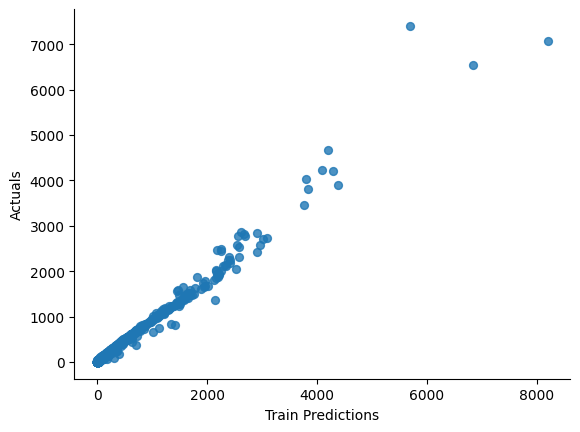

In [30]:
# @title Train Predictions vs Actuals

from matplotlib import pyplot as plt
train_results.plot(kind='scatter', x='Train Predictions', y='Actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

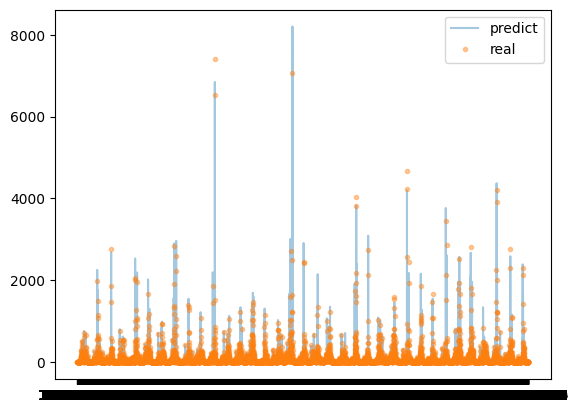

In [29]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:], alpha = 0.4)
plt.plot(train_results['Actuals'][:],'.', alpha = 0.4)

plt.legend(['predict','real'])

In [31]:
val_predictions = modelnew.predict(validX).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':validY})
val_results

92/92 [==============================] - 0s 3ms/step


,Val Predictions,Actuals
date,,
2009-01-01,-3.237919,0.000
2009-01-02,-2.611683,0.825
2009-01-03,-0.037753,3.904
2009-01-04,-3.237919,0.000
2009-01-05,-3.237919,0.000
...,...,...
2016-12-27,40.646526,48.734
2016-12-28,43.592514,48.803
2016-12-29,31.508593,37.903


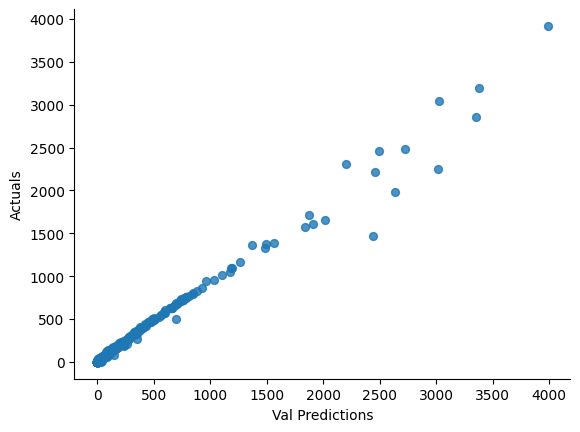

In [34]:
# @title Val Predictions vs Actuals

from matplotlib import pyplot as plt
val_results.plot(kind='scatter', x='Val Predictions', y='Actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

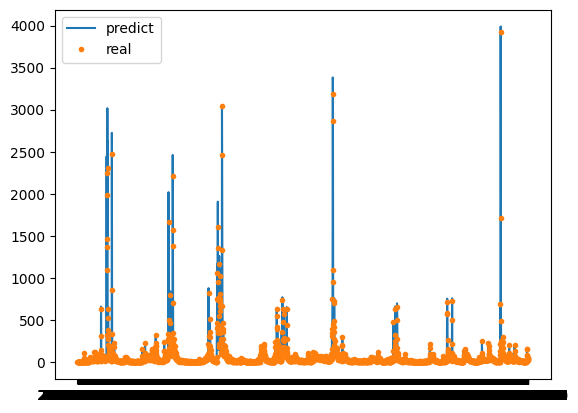

In [33]:
plt.plot(val_results['Val Predictions'][:])
plt.plot(val_results['Actuals'][:],'.')

plt.legend(['predict','real'])

In [35]:
test_predictions = modelnew.predict(testX).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':testY})
test_results

80/80 [==============================] - 0s 3ms/step


,Test Predictions,Actuals
date,,
2017-01-01,18.619823,23.795
2017-01-02,18.650015,23.830
2017-01-03,13.773881,18.401
2017-01-04,23.664442,29.361
2017-01-05,19.131128,23.988
...,...,...
2023-12-27,20.508400,25.873
2023-12-28,16.254955,21.186
2023-12-29,15.985738,20.887


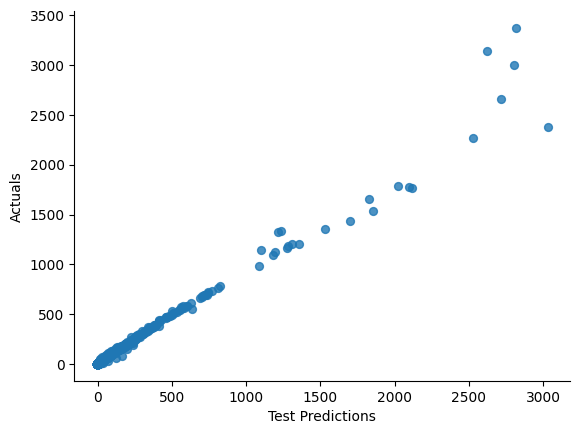

In [36]:
# @title Test Predictions vs Actuals

from matplotlib import pyplot as plt
test_results.plot(kind='scatter', x='Test Predictions', y='Actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

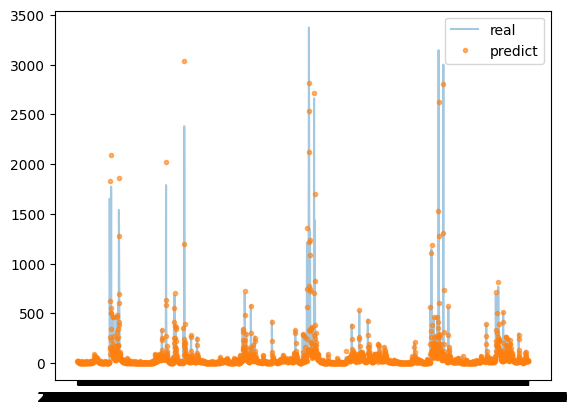

In [37]:
plt.plot(test_results['Actuals'][:], alpha=0.4)
plt.plot(test_results['Test Predictions'][:],'.',alpha = 0.6)

plt.legend(['real', 'predict'])

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(testY, test_predictions))
rsquared_score = r2_score(testY, test_predictions)
print('R^2 Score : %f' %(rsquared_score))
print('RMSE : %.2f' %(rmse))

R^2 Score : 0.980538
RMSE : 27.13


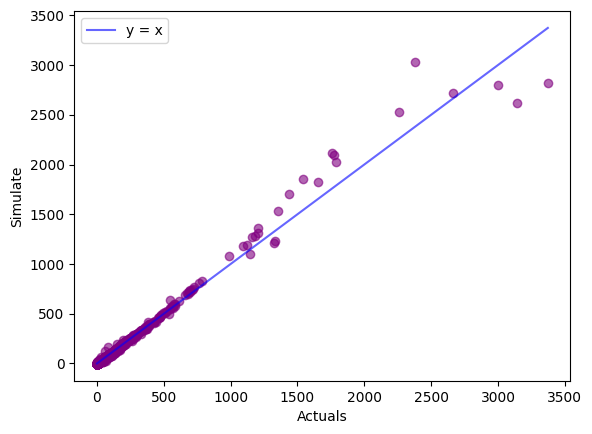

In [39]:
x = np.arange(0,max(test_results['Actuals']))
y = x
plt.scatter(test_results['Actuals'][:], test_results['Test Predictions'][:], color = 'purple', alpha = 0.6)
plt.plot(x,y, color = 'blue', alpha = 0.6, label = 'y = x')
plt.xlabel('Actuals')
plt.ylabel('Simulate')

plt.legend()
plt.show()

In [40]:
# NSE
from numpy import mean
num_sum1 = 0
num_sum2 = 0
num_avg = mean(test_results['Actuals'][:])
for i in range(len(test_results)):
  num1 = test_results['Actuals'][i] - test_results['Test Predictions'][i]
  num_sum1 += num1**2
  num2 = test_results['Actuals'][i] - num_avg
  num_sum2 += num2**2

nse = 1 - (num_sum1 / num_sum2)
print('NSE : %f' %nse)

NSE : 0.980538


In [41]:
# PBIAS
num_sum1 = 0
for i in range(len(test_results)):
  num1 = test_results['Actuals'][i] - test_results['Test Predictions'][i]
  num_sum1 += num1

pbias = (num_sum1 / np.sum(test_results['Actuals'][:])) * 100
print('PBIAS : %f' %pbias)

PBIAS : 5.055071


In [42]:
#R^2
import math

num_sum1 = 0
num_sum2 = 0
num_sum3 = 0
act_avg = mean(test_results['Actuals'][:])
pred_avg = mean(test_results['Test Predictions'][:])
for i in range(len(test_results)):
  num1 = (test_results['Actuals'][i] - act_avg) * (test_results['Test Predictions'][i] - pred_avg)
  num_sum1 += num1
  num2 = test_results['Actuals'][i] - pred_avg
  num_sum2 += num2**2
  num3 = test_results['Test Predictions'][i] - pred_avg
  num_sum3 += num3**2

r_square = (num_sum1 / (math.sqrt(num_sum2)* math.sqrt(num_sum3)))**2
print('R Square : %f' %r_square)

R Square : 0.982131
